In [ ]:
!pip install -U ultralytics

## Data prep

In [1]:
#clear the symlink 
import shutil
import os
import glob
for f in glob.glob("YOLO/data/**/*.cache", recursive=True):
     os.remove(f)
shutil.rmtree("YOLO/data", ignore_errors=True)

In [ ]:
import os
import pandas as pd
import numpy as np
fileExt='.jpg'
dataSet=pd.read_csv('Data/labels.csv')
categories= dataSet['breed'].unique().tolist()
# creat all the folders 
for item in categories:
    os.makedirs(f'YOLO/data/train/{item}', exist_ok=True)
    os.makedirs(f'YOLO/data/val/{item}', exist_ok=True)
#creat symlinks
for row in dataSet.itertuples():
    if np.random.rand() < 0.8:
        #abslout path should be used for symlink, otherwise it may cause issues
        os.symlink(os.path.abspath(f'Data/train/{row.id}{fileExt}'), f'YOLO/data/train/{row.breed}/{row.id}{fileExt}')
    else:
        os.symlink(os.path.abspath(f'Data/train/{row.id}{fileExt}'), f'YOLO/data/val/{row.breed}/{row.id}{fileExt}')


In [ ]:
#create yaml filke 

content = 'path: YOLO/data\ntrain: train\nval: val\nnames:\n'

for idx, category in enumerate(categories):
    content += f'  {idx}: {category}\n'
with open('YOLO/dog_data.yaml', 'w') as f:
    f.write(content)

In [6]:
print(os.path.exists(f'Data/train/{row.id}{fileExt}'))
print(os.path.exists(f'Data/{row.breed}'))


True
True


In [ ]:
from ultralytics import YOLO
#model = YOLO("yolo11l-cls.yaml") 
model=YOLO('yolo11l-cls.pt')
model.train(data='YOLO/data', epochs=30, batch=8, imgsz=224, name='yolo11L-dog-cls', patience=5, 
            project='first',freeze=1, optimizer='Adam',resume=False, lr0	=1e-4,lrf=0.1, val=True, plots=True, device='mps')

Ultralytics 8.3.235 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Max)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=YOLO/data, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=1, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11L-dog-cls6, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x33d5a8cd0>
curves: []
curves_results: []
fitness: 0.873130589723587
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7786639928817749, 'metrics/accuracy_top5': 0.9675971865653992, 'fitness': 0.873130589723587}
save_dir: PosixPath('/Users/damoon/Desktop/Python/ML practice/Dog Classification/first/yolo11L-dog-cls6')
speed: {'preprocess': 0.07300523313083652, 'inference': 0.8217749242849114, 'loss': 1.79478650725078e-05, 'postprocess': 5.554177325705469e-05}
task: 'classify'
top1: 0.7786639928817749
top5: 0.9675971865653992

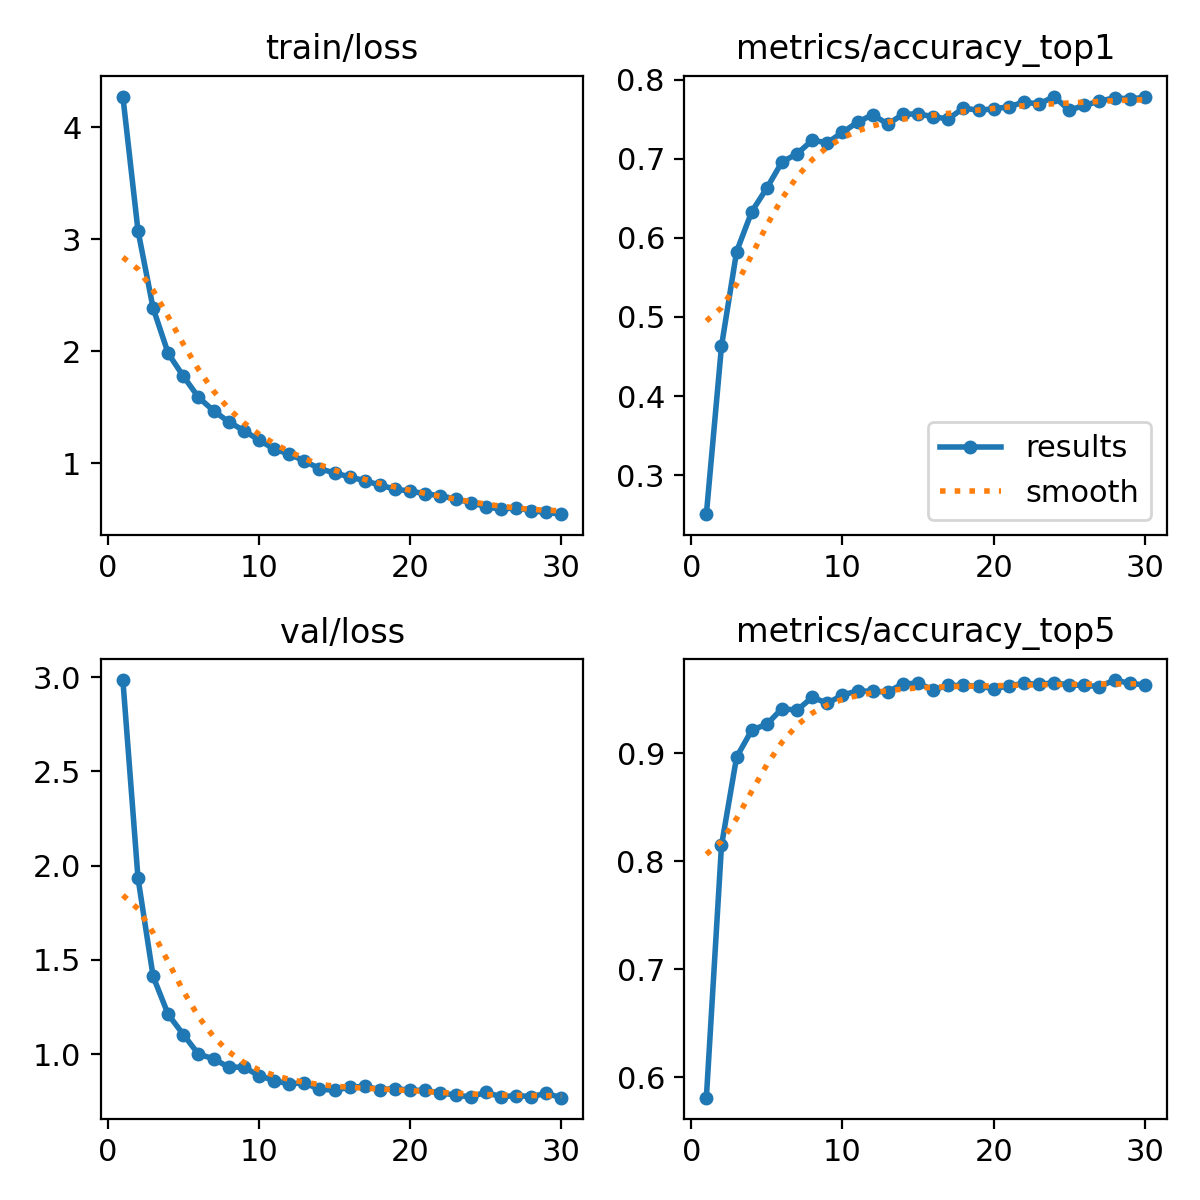

In [6]:
from ultralytics import YOLO
#model = YOLO("yolo11l-cls.yaml") 
model=YOLO('yolo11l-cls.pt')
model.train(data='YOLO/data', epochs=50, batch=8, imgsz=224, name='yolo11L-dog-cls', patience=5, 
            # unfreez all the layers
            project='second',freeze=0, optimizer='Adam',resume=False, lr0=1e-4,lrf=0.1, val=True, plots=True, device='mps',
            # control image augmentation parameters
            augment=True,auto_augment=None, erasing=0.05,fliplr=0.5
            )



New https://pypi.org/project/ultralytics/8.3.236 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.235 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Max)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=YOLO/data, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.05, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11L-dog-cls, nbs=64, nms=False, opset=None, optimize=False, optimizer=Ada

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x585e5c750>
curves: []
curves_results: []
fitness: 0.856929212808609
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7602193355560303, 'metrics/accuracy_top5': 0.9536390900611877, 'fitness': 0.856929212808609}
save_dir: PosixPath('/Users/damoon/Desktop/Python/ML practice/Dog Classification/second/yolo11L-dog-cls')
speed: {'preprocess': 0.054134242898196815, 'inference': 0.5939738251708062, 'loss': 3.82201483330187e-05, 'postprocess': 9.434161882323853e-05}
task: 'classify'
top1: 0.7602193355560303
top5: 0.9536390900611877

![alt text](image.png)

In [7]:
from ultralytics import YOLO
#model = YOLO("yolo11l-cls.yaml") 
model=YOLO('yolo11l-cls.pt')
model.train(data='YOLO/data', epochs=50, batch=8, imgsz=224, name='yolo11L-dog-cls', patience=5, 
            # unfreeze back the first layer 
            project='third',freeze=1, optimizer='Adam',resume=False, lr0=1e-4,lrf=0.1, val=True, plots=True, device='mps',
            # Increase image augmentation parameters
            augment=True,auto_augment='randaugment', erasing=0.05,fliplr=0.5, mixup=0.1,cutmix=0.1
            )

New https://pypi.org/project/ultralytics/8.3.236 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.235 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Max)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.1, data=YOLO/data, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.05, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=1, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11L-dog-cls, nbs=64, nms=False, opset=None, optimize=False, optimi

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x585e55bd0>
curves: []
curves_results: []
fitness: 0.856929212808609
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7587238550186157, 'metrics/accuracy_top5': 0.9551345705986023, 'fitness': 0.856929212808609}
save_dir: PosixPath('/Users/damoon/Desktop/Python/ML practice/Dog Classification/third/yolo11L-dog-cls')
speed: {'preprocess': 0.05213280840046102, 'inference': 0.5251759129199398, 'loss': 3.2941589794926726e-05, 'postprocess': 9.249191515793947e-05}
task: 'classify'
top1: 0.7587238550186157
top5: 0.9551345705986023

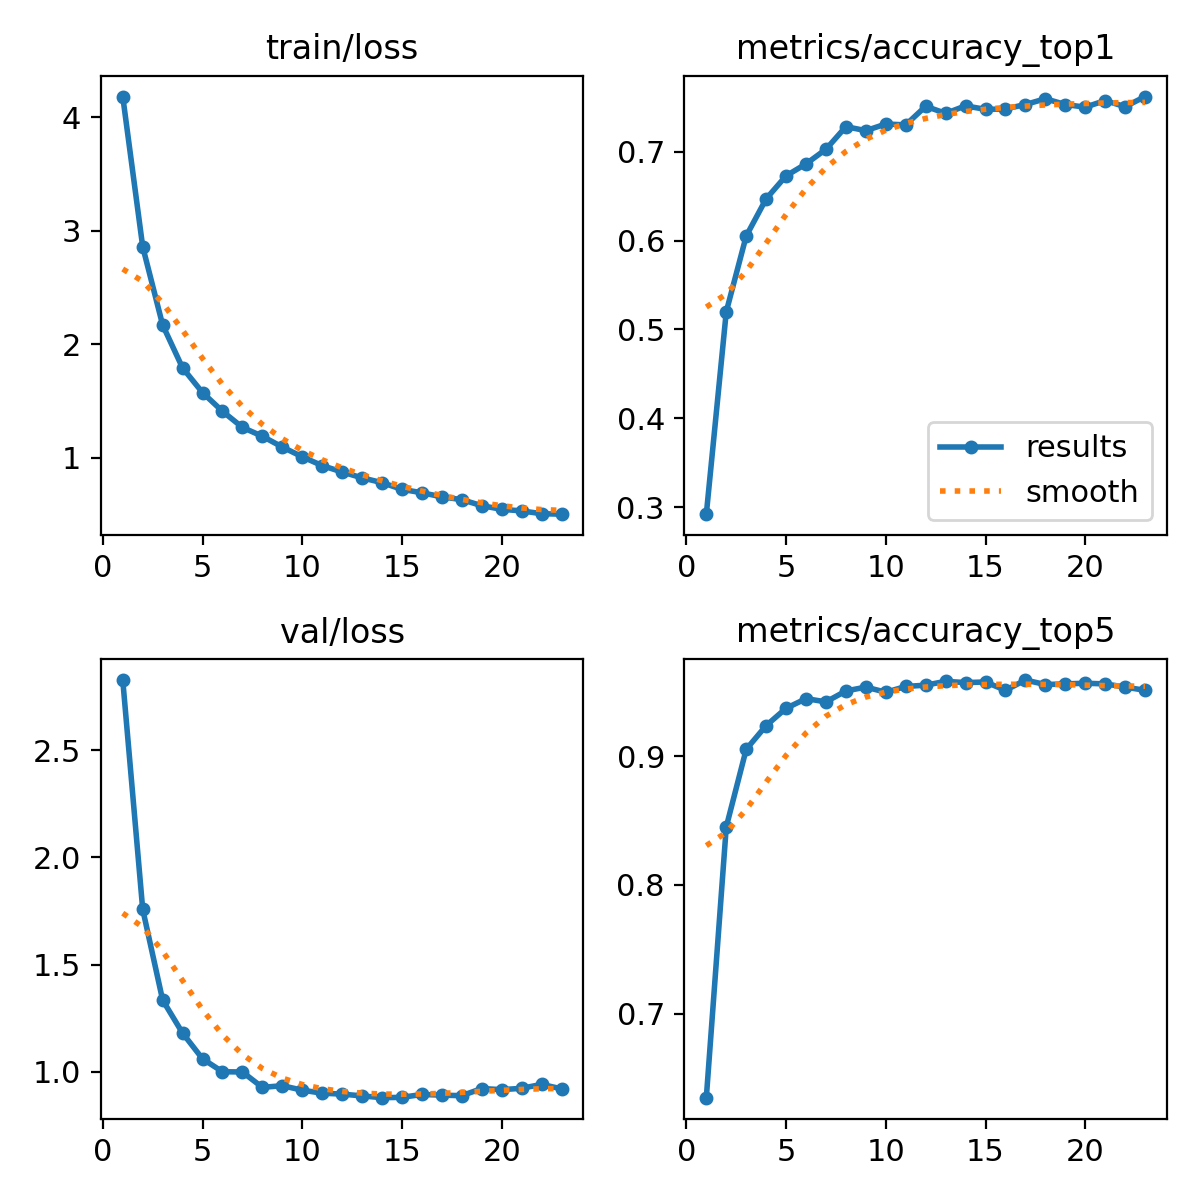

In [ ]:
from ultralytics import YOLO
#model = YOLO("yolo11l-cls.yaml") 
model=YOLO('yolo11l-cls.pt')
model.train(data='YOLO/data', epochs=50, batch=8, imgsz=224, name='yolo11L-dog-cls', patience=5, 
            # unfreeze the first layer and increase the intital learning rate
            project='third',freeze=0, optimizer='Adam',resume=False, lr0=1e-3,lrf=0.01, val=True, plots=True, device='mps',
            # No augmentation parameters
            augment=False,auto_augment=None, erasing=0.05,fliplr=0.5, mixup=0.1,cutmix=0.1
            )

New https://pypi.org/project/ultralytics/8.3.236 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.235 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Max)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=None, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.1, data=YOLO/data, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.05, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11L-dog-cls4, nbs=64, nms=False, opset=None, optimize=False, optimizer=A

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x523e2a310>
curves: []
curves_results: []
fitness: 0.8429710865020752
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7367896437644958, 'metrics/accuracy_top5': 0.9491525292396545, 'fitness': 0.8429710865020752}
save_dir: PosixPath('/Users/damoon/Desktop/Python/ML practice/Dog Classification/third/yolo11L-dog-cls4')
speed: {'preprocess': 0.05906129593414033, 'inference': 0.49930581208299907, 'loss': 2.8914641050374874e-05, 'postprocess': 8.07579355137952e-05}
task: 'classify'
top1: 0.7367896437644958
top5: 0.9491525292396545

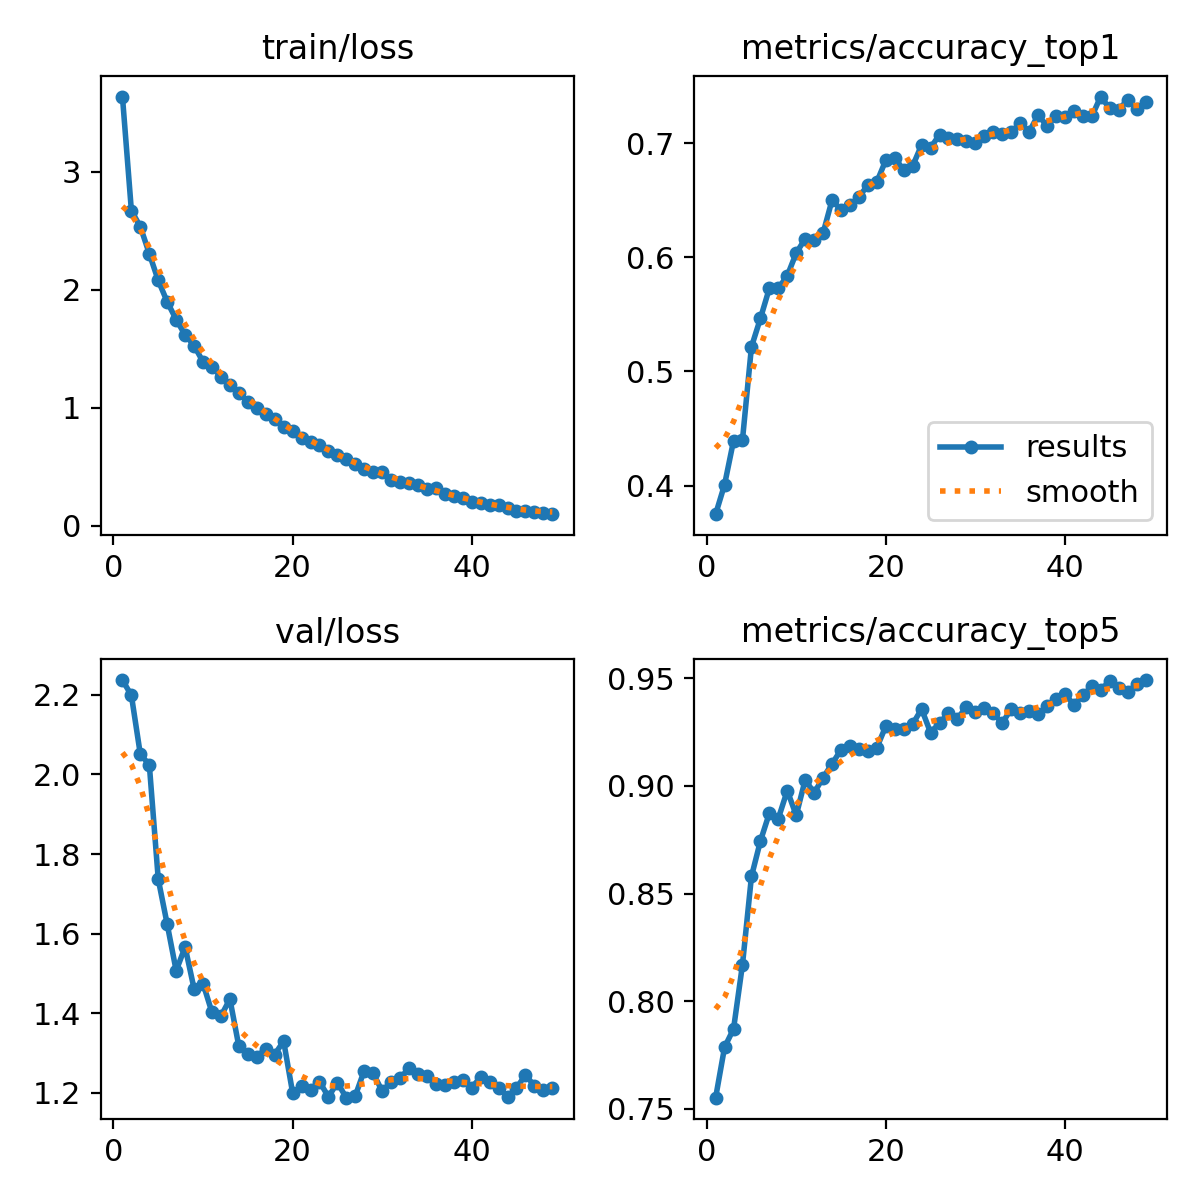

In [16]:
from PIL import Image
import os
import pandas as pd

folder = 'Data/train/'
rows = []

for file in os.listdir(folder):
    if file.lower().endswith('.jpg'):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)
        width, height = img.size
        
        rows.append({
            'id': os.path.splitext(file)[0],
            'width': width,
            'height': height
        })

imageData = pd.DataFrame(rows)

print(f"Mean width:  {imageData['width'].mean()}")
print(f"Mean height: {imageData['height'].mean()}")

print("Min width:", imageData['width'].min(), " Min height:", imageData['height'].min())
print("Max width:", imageData['width'].max(), " Max height:", imageData['height'].max())


Mean width:  443.33153981608297
Mean height: 386.74721189591077
Min width: 97  Min height: 102
Max width: 3264  Max height: 2562


In [19]:
from ultralytics import YOLO
#model = YOLO("yolo11l-cls.yaml") 
model=YOLO('fourth/yolo11L-dog-cls/weights/best.pt')
model.train(data='YOLO/data', epochs=70, batch=8, imgsz=344, name='yolo11L-dog-cls', patience=10, 
            # unfreeze the first layer and increase the intital learning rate
            project='fourth',freeze=1, optimizer='Adam',resume=False, lr0=1e-3,lrf=0.01, val=True, plots=True, device='mps',
            # No augmentation parameters
            augment=False,auto_augment=None, erasing=0.05,fliplr=0.5, mixup=0.1,cutmix=0.1
            )

New https://pypi.org/project/ultralytics/8.3.237 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.235 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Max)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=None, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.1, data=YOLO/data, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.05, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=1, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=344, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=fourth/yolo11L-dog-cls/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11L-dog-cls2, nbs=64, nms=False, opset=None, opt

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x4bb50a410>
curves: []
curves_results: []
fitness: 0.8192921280860901
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.705383837223053, 'metrics/accuracy_top5': 0.9332004189491272, 'fitness': 0.8192921280860901}
save_dir: PosixPath('/Users/damoon/Desktop/Python/ML practice/Dog Classification/fourth/yolo11L-dog-cls2')
speed: {'preprocess': 0.0845945488632743, 'inference': 1.2324610170824704, 'loss': 5.404827958446438e-05, 'postprocess': 0.00015563788384585414}
task: 'classify'
top1: 0.705383837223053
top5: 0.9332004189491272

In [ ]:
## sanity check of the dataset structure
import os

root = "YOLO/data"
print("Root exists:", os.path.isdir(root))

for split in ["train", "val"]:
    split_dir = os.path.join(root, split)
    print(f"\nSplit: {split_dir}, exists:", os.path.isdir(split_dir))
    if not os.path.isdir(split_dir):
        continue
    for cls in os.listdir(split_dir):
        cls_dir = os.path.join(split_dir, cls)
        if not os.path.isdir(cls_dir):
            continue
        n_imgs = sum(
            1
            for f in os.listdir(cls_dir)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        )
        print(f"  Class '{cls}': {n_imgs} images")


Root exists: True

Split: YOLO/data/train, exists: True
  Class 'australian_terrier': 79 images
  Class 'toy_poodle': 59 images
  Class 'great_pyrenees': 92 images
  Class 'maltese_dog': 98 images
  Class 'norwich_terrier': 67 images
  Class 'whippet': 74 images
  Class 'boston_bull': 70 images
  Class 'irish_setter': 71 images
  Class 'rottweiler': 61 images
  Class 'kelpie': 68 images
  Class 'schipperke': 71 images
  Class 'leonberg': 90 images
  Class 'welsh_springer_spaniel': 54 images
  Class 'pomeranian': 86 images
  Class 'pekinese': 64 images
  Class 'irish_wolfhound': 74 images
  Class 'blenheim_spaniel': 77 images
  Class 'basenji': 87 images
  Class 'african_hunting_dog': 70 images
  Class 'komondor': 61 images
  Class 'yorkshire_terrier': 64 images
  Class 'basset': 66 images
  Class 'japanese_spaniel': 81 images
  Class 'standard_schnauzer': 60 images
  Class 'dhole': 64 images
  Class 'miniature_pinscher': 74 images
  Class 'lhasa': 67 images
  Class 'walker_hound': 52 i

In [7]:
import os

root = "YOLO/data"
for split in ["train", "val"]:
    split_dir = os.path.join(root, split)
    print(f"\nChecking {split_dir}")
    missing = 0
    total = 0
    for cls in os.listdir(split_dir):
        cls_dir = os.path.join(split_dir, cls)
        if not os.path.isdir(cls_dir):
            continue
        for f in os.listdir(cls_dir):
            path = os.path.join(cls_dir, f)
            if not f.lower().endswith((".jpg", ".jpeg", ".png")):
                continue
            total += 1
            if not os.path.exists(path):   # 🔑 real check
                missing += 1
    print(f"Total images: {total}, missing targets: {missing}")



Checking YOLO/data/train
Total images: 8211, missing targets: 8211

Checking YOLO/data/val
Total images: 2011, missing targets: 2011
